In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
#loading the diabetes dataset to a pandas Dataframe
diabetes_dataset = pd.read_csv("/content/drive/MyDrive/ML Projects/Diabetes Prediction'/diabetes.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_dataset.shape

(768, 9)

In [8]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 ---> Non-Diabetic

1 ----> Diabetic

In [10]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# Remove duplicate records
diabetes_dataset1 = diabetes_dataset.drop_duplicates()

In [14]:
diabetes_dataset1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
# Check for missing values and their data types
missing_info = diabetes_dataset1.isnull().sum()
print("Missing Values:")
print(missing_info)

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [16]:
diabetes_dataset1 = diabetes_dataset1.dropna()

In [17]:
diabetes_dataset1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Remove Outliers

In [18]:
diabetes_dataset1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
diabetes_dataset1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<ipython-input-20-9e55884ac07f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_dataset1['SkinThickness'])
<ipython-input-20-9e55884ac07f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_dataset1['BMI'])


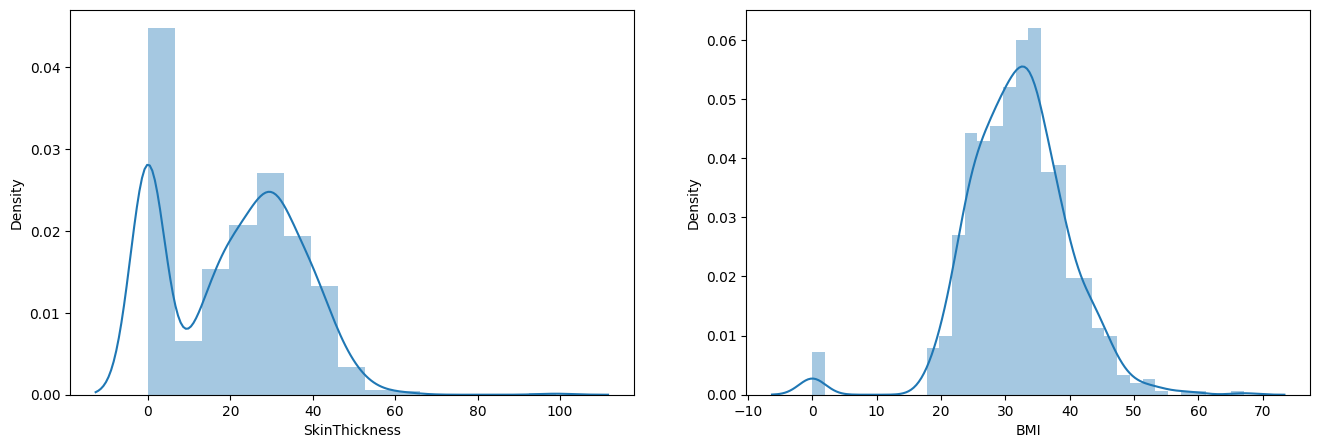

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(diabetes_dataset1['SkinThickness'])

plt.subplot(1,2,2)
sns.distplot(diabetes_dataset1['BMI'])

plt.show()

<Axes: >

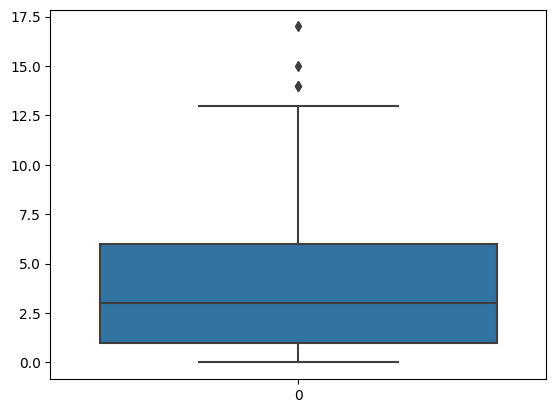

In [21]:
sns.boxplot(diabetes_dataset1['Pregnancies'])

<Axes: >

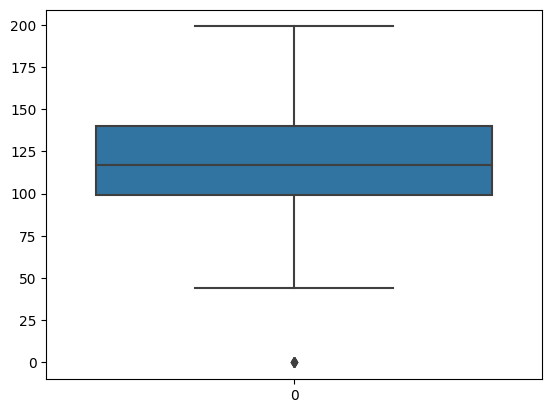

In [22]:
sns.boxplot(diabetes_dataset1['Glucose'])

<Axes: >

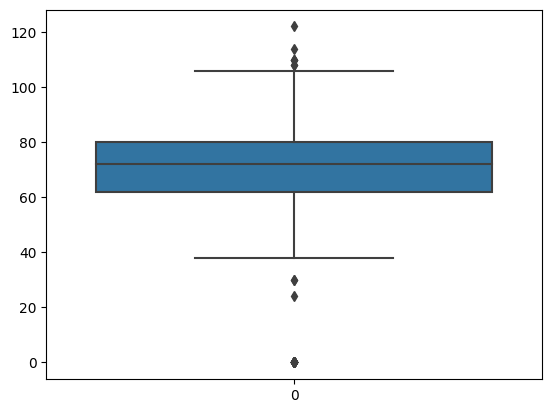

In [23]:
sns.boxplot(diabetes_dataset1['BloodPressure'])

<Axes: >

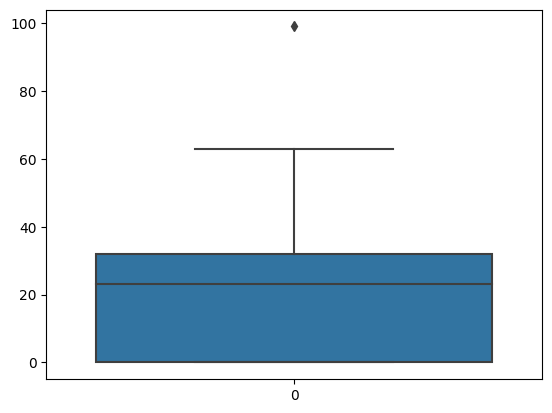

In [24]:
sns.boxplot(diabetes_dataset1['SkinThickness'])

<Axes: >

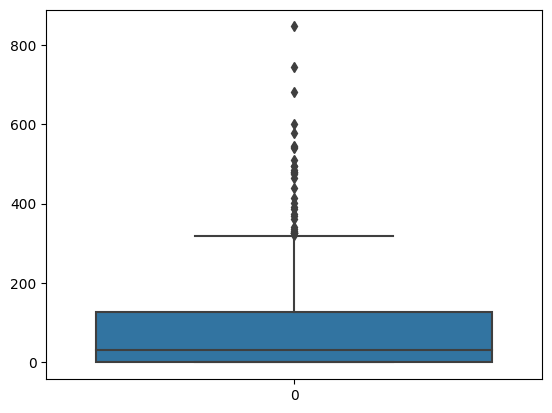

In [25]:
sns.boxplot(diabetes_dataset1['Insulin'])

<Axes: >

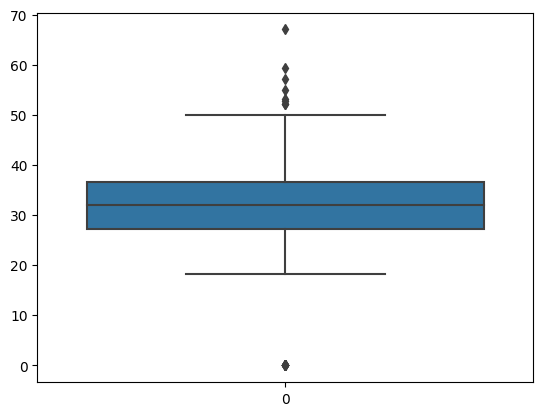

In [26]:
sns.boxplot(diabetes_dataset1['BMI'])

<Axes: >

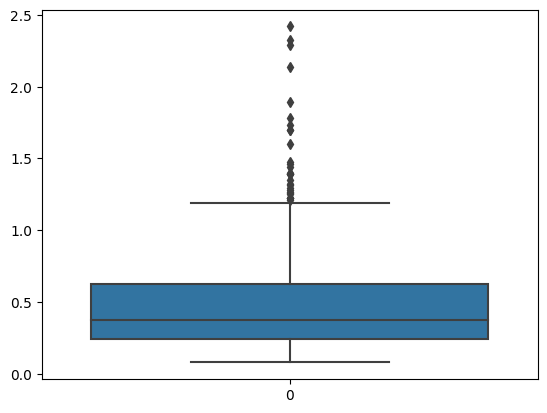

In [27]:
sns.boxplot(diabetes_dataset1['DiabetesPedigreeFunction'])

<Axes: >

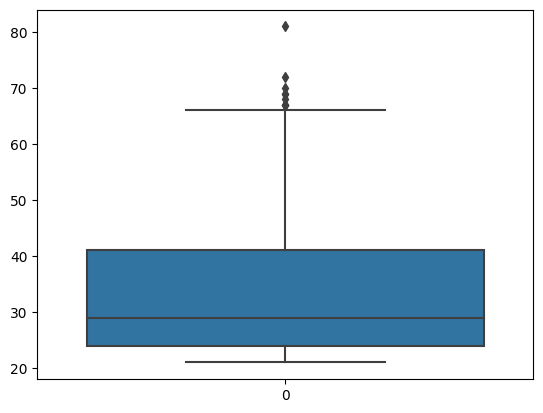

In [28]:
sns.boxplot(diabetes_dataset1['Age'])

<Axes: >

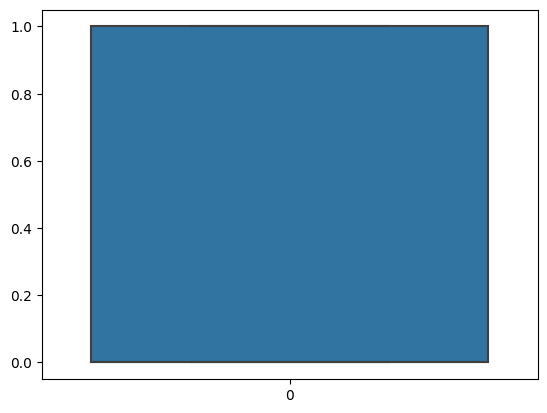

In [29]:
sns.boxplot(diabetes_dataset1['Outcome'])

In [30]:
#remove outliers of pregnencies column

percentile25 = diabetes_dataset1['Pregnancies'].quantile(0.25)
percentile75 = diabetes_dataset1['Pregnancies'].quantile(0.75)

In [31]:
percentile75

6.0

In [32]:
iqr = percentile75 - percentile25

In [33]:
iqr

5.0

In [34]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [35]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 13.5
Lower limit -6.5


In [36]:
diabetes_dataset1[diabetes_dataset1['Pregnancies'] > upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [37]:
diabetes_dataset1[diabetes_dataset1['Pregnancies'] < lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [38]:
filter_data_pg = diabetes_dataset1[(diabetes_dataset1['Pregnancies'] < upper_limit) | (diabetes_dataset1['Pregnancies'] > lower_limit) ]

In [39]:
filter_data_pg

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
filter_data_pg.shape

(768, 9)

In [41]:
#remove outliers of BloodPressure column

percentile25_bp = filter_data_pg['BloodPressure'].quantile(0.25)
percentile75_bp = filter_data_pg['BloodPressure'].quantile(0.75)

In [42]:
percentile75_bp

80.0

In [43]:
iqr_bp = percentile75_bp - percentile25_bp

In [44]:
iqr_bp

18.0

In [45]:
upper_limit_bp = percentile75_bp + 1.5 * iqr_bp
lower_limit_bp = percentile25_bp - 1.5 * iqr_bp

In [46]:
print("Upper limit",upper_limit_bp)
print("Lower limit",lower_limit_bp)

Upper limit 107.0
Lower limit 35.0


In [47]:
filter_data_bp = filter_data_pg[(filter_data_pg['BloodPressure'] > lower_limit_bp) & (filter_data_pg['BloodPressure'] < upper_limit_bp)]

In [48]:
filter_data_bp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
filter_data_bp.shape

(723, 9)

In [50]:
#remove outliers of Insulin column

percentile25_ins = filter_data_bp['Insulin'].quantile(0.25)
percentile75_ins = filter_data_bp['Insulin'].quantile(0.75)

In [51]:
percentile75_ins

130.0

In [52]:
iqr_ins = percentile75_ins - percentile25_ins

In [53]:
iqr_ins

130.0

In [54]:
upper_limit_ins = percentile75_ins + 1.5 * iqr_ins
lower_limit_ins = percentile25_ins - 1.5 * iqr_ins

In [55]:
print("Upper limit",upper_limit_ins)
print("Lower limit",lower_limit_ins)

Upper limit 325.0
Lower limit -195.0


In [56]:
filter_data_bp[filter_data_bp['Insulin'] > upper_limit_ins]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1
247,0,165,90,33,680,52.3,0.427,23,0


In [57]:
filter_data_bp[filter_data_bp['Insulin'] < lower_limit_ins]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [58]:
filter_data_ins = filter_data_bp[filter_data_bp['Insulin'] < upper_limit]

In [59]:
filter_data_ins.shape

(334, 9)

In [60]:
#remove outliers of BMI column

percentile25_bmi = filter_data_ins['BMI'].quantile(0.25)
percentile75_bmi = filter_data_ins['BMI'].quantile(0.75)

In [61]:
percentile75_bmi

35.6

In [62]:
iqr_bmi = percentile75_bmi - percentile25_bmi

In [63]:
iqr_bmi

8.875

In [64]:
upper_limit_bmi = percentile75_bmi + 1.5 * iqr_bmi
lower_limit_bmi = percentile25_bmi - 1.5 * iqr_bmi

In [65]:
print("Upper limit",upper_limit_bmi)
print("Lower limit",lower_limit_bmi)

Upper limit 48.9125
Lower limit 13.412500000000001


In [66]:
filter_data_ins[filter_data_ins['BMI'] > upper_limit_bmi]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
155,7,152,88,44,0,50.0,0.337,36,1
303,5,115,98,0,0,52.9,0.209,28,1
681,0,162,76,36,0,49.6,0.364,26,1
746,1,147,94,41,0,49.3,0.358,27,1


In [67]:
filter_data_ins[filter_data_ins['BMI'] < lower_limit_bmi]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
145,0,102,75,23,0,0.0,0.572,21,0
684,5,136,82,0,0,0.0,0.640,69,0


In [68]:
filter_data_bmi = filter_data_ins[(filter_data_ins['BMI'] > lower_limit_bmi) & (filter_data_ins['BMI'] < upper_limit_bmi)]

In [69]:
filter_data_bmi.shape

(327, 9)

In [70]:
#remove outliers from DiabetesPedigreeFunction function

percentile25_d = filter_data_bmi['DiabetesPedigreeFunction'].quantile(0.25)
percentile75_d = filter_data_bmi['DiabetesPedigreeFunction'].quantile(0.75)

In [71]:
percentile75_d

0.551

In [72]:
iqr_d = percentile75_d - percentile25_d

In [73]:
iqr_d

0.3425

In [74]:
upper_limit_d = percentile75_d + 1.5 * iqr_d
lower_limit_d = percentile25_d - 1.5 * iqr_d

In [75]:
print("Upper limit",upper_limit_d)
print("Lower limit",lower_limit_d)

Upper limit 1.06475
Lower limit -0.30525


In [76]:
filter_data_bmi[filter_data_bmi['DiabetesPedigreeFunction'] > upper_limit_d]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139,80,0,0,27.1,1.441,57,0
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
131,9,122,56,0,0,33.3,1.114,33,1
218,5,85,74,22,0,29.0,1.224,32,1
245,9,184,85,15,0,30.0,1.213,49,1
267,2,128,64,42,0,40.0,1.101,24,0
270,10,101,86,37,0,45.6,1.136,38,1
314,7,109,80,31,0,35.9,1.127,43,1


In [77]:
filter_data_bmi[filter_data_bmi['DiabetesPedigreeFunction'] < lower_limit_d]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [78]:
filter_data_d = filter_data_bmi[filter_data_bmi['DiabetesPedigreeFunction'] < upper_limit_d]

In [79]:
filter_data_d.shape

(308, 9)

In [80]:
#remove outliers of Age column

percentile25_age = filter_data_d['Age'].quantile(0.25)
percentile75_age = filter_data_d['Age'].quantile(0.75)

In [81]:
percentile75_age

44.0

In [82]:
iqr_age = percentile75_age - percentile25_age

In [83]:
iqr_age

19.0

In [84]:
upper_limit_age = percentile75_age + 1.5 * iqr_age
lower_limit_age = percentile25_age - 1.5 * iqr_age

In [85]:
print("Upper limit",upper_limit_age)
print("Lower limit",lower_limit_age)

Upper limit 72.5
Lower limit -3.5


In [86]:
filter_data_d[filter_data_d['Age'] > upper_limit_age]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [87]:
filter_data_d[filter_data_d['Age'] < lower_limit_age]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [88]:
#seperating the data and models
X = filter_data_d.drop(columns = "Outcome" , axis=1)
Y = filter_data_d["Outcome"]

In [89]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
5,5,116,74,0,0,25.6,0.201,30
10,4,110,92,0,0,37.6,0.191,30
...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43
762,9,89,62,0,0,22.5,0.142,33
764,2,122,70,27,0,36.8,0.340,27
766,1,126,60,0,0,30.1,0.349,47


In [90]:
Y

0      1
1      0
2      1
5      0
10     0
      ..
761    1
762    0
764    0
766    1
767    0
Name: Outcome, Length: 308, dtype: int64

Data Standarization

In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(X)

StandardScaler()

In [93]:
standardied_data = scaler.transform(X)

In [94]:
standardied_data


array([[ 0.44581763,  0.92391514, -0.13568834, ...,  0.36072748,
         1.25305478,  1.06874784],
       [-1.03383571, -1.01399961, -0.67726943, ..., -0.7678873 ,
        -0.0631242 , -0.40424141],
       [ 1.03767897,  2.00053445, -0.85779646, ..., -1.29994855,
         1.46764918, -0.32671566],
       ...,
       [-0.73790504,  0.1241408 , -0.31621537, ...,  0.87666566,
        -0.1155806 , -0.71434441],
       [-1.03383571,  0.247183  , -1.21885052, ..., -0.20357991,
        -0.07266173,  0.83617059],
       [-1.03383571, -0.7679152 , -0.31621537, ..., -0.15521071,
        -0.23479971, -1.02444741]])

In [95]:
X = standardied_data

In [96]:
X

array([[ 0.44581763,  0.92391514, -0.13568834, ...,  0.36072748,
         1.25305478,  1.06874784],
       [-1.03383571, -1.01399961, -0.67726943, ..., -0.7678873 ,
        -0.0631242 , -0.40424141],
       [ 1.03767897,  2.00053445, -0.85779646, ..., -1.29994855,
         1.46764918, -0.32671566],
       ...,
       [-0.73790504,  0.1241408 , -0.31621537, ...,  0.87666566,
        -0.1155806 , -0.71434441],
       [-1.03383571,  0.247183  , -1.21885052, ..., -0.20357991,
        -0.07266173,  0.83617059],
       [-1.03383571, -0.7679152 , -0.31621537, ..., -0.15521071,
        -0.23479971, -1.02444741]])

In [97]:
Y

0      1
1      0
2      1
5      0
10     0
      ..
761    1
762    0
764    0
766    1
767    0
Name: Outcome, Length: 308, dtype: int64

Train Test Split

In [98]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [99]:
print(X.shape, X_train.shape, X_test.shape)

(308, 8) (246, 8) (62, 8)


Training the Model

In [100]:
classifier = svm.SVC(kernel='linear')

In [101]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evalution

Accuracy Score

In [102]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [103]:
print("Accuracy score of the training data : ",training_data_accuracy  )

Accuracy score of the training data :  0.7642276422764228


In [104]:
#accuracy score on the testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [105]:
print("Accuracy score of the testing data : ",testing_data_accuracy  )

Accuracy score of the testing data :  0.7258064516129032


Predicting Result from Input Data

In [121]:
input_data = (2,197,70,45,543,30.5,0.158,53)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standarized the input data
std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('This person is not Diabetic')
else :
    print('This person is Diabetic')

[1]
This person is Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Logistic Regression**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [108]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

Training and Predicting

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [111]:

logmodel.score(X_test,Y_test)

0.7419354838709677

In [112]:

logmodel.score(X_test,Y_test)

0.7419354838709677

**Naive Bayes**

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [114]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)


In [115]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [116]:
pred = gnb.predict(X_test)

In [117]:
print(gnb.score(X_test,Y_test))

0.6935483870967742
